In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import gaussian_kde
from scipy.signal import argrelextrema

In [2]:
# final kmatrix
with open('/Users/arjuns/Downloads/code_res_paper/paper-results-code/weisfeilerlehman/final_kernel_matrix/complete_kernel_matrix_v2.pkl', 'rb') as f:
    kmatrix = pickle.load(f)

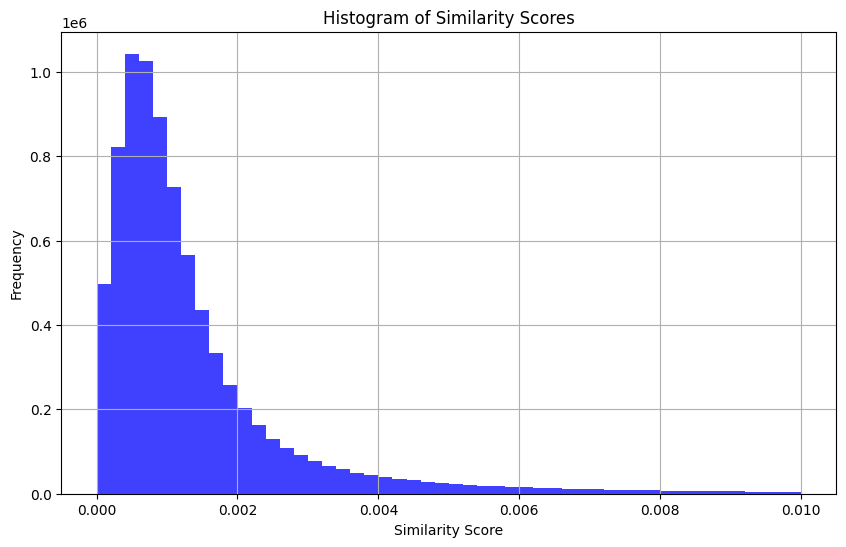

In [3]:
similarity_matrix = np.array(kmatrix)
similarity_matrix = (similarity_matrix + similarity_matrix.T) / 2

np.fill_diagonal(similarity_matrix, 0) # Remove self-similarities

# Flatten the matrix and remove zero values (self-similarities already removed)
similarity_scores = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]

plt.figure(figsize=(10, 6))
plt.hist(similarity_scores, bins=50, alpha=0.75, color='blue', range=(0, 0.01))
plt.title('Histogram of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Step 1: KDE to estimate the probability density function
kde = gaussian_kde(similarity_scores)
x_grid = np.linspace(0, 0.01, 1000)  # Define a grid over our range of interest
kde_pdf = kde.evaluate(x_grid)

# Step 2: Calculate the second derivative
kde_pdf_second_derivative = np.gradient(np.gradient(kde_pdf))

# Step 3: Identify inflection points (local minima and maxima of second derivative)
inflection_maxima = argrelextrema(kde_pdf_second_derivative, np.greater)[0]  # Local maxima
inflection_minima = argrelextrema(kde_pdf_second_derivative, np.less)[0]  # Local minima
inflection_points = x_grid[np.concatenate((inflection_maxima, inflection_minima))]


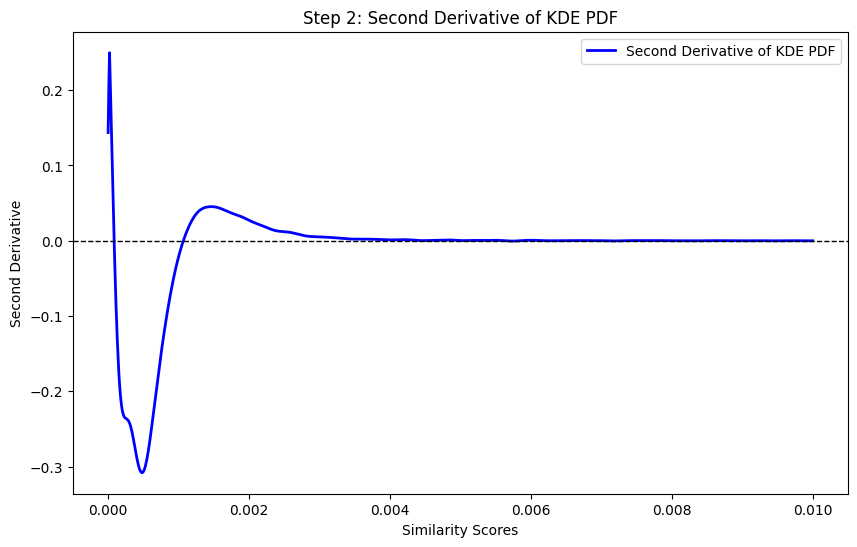

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(x_grid, kde_pdf_second_derivative, label="Second Derivative of KDE PDF", color="blue", linewidth=2)
plt.title("Step 2: Second Derivative of KDE PDF")
plt.xlabel("Similarity Scores")
plt.ylabel("Second Derivative")
plt.axhline(0, color="black", linestyle="--", linewidth=1)  # Add a horizontal line at y=0
plt.legend()
plt.show()

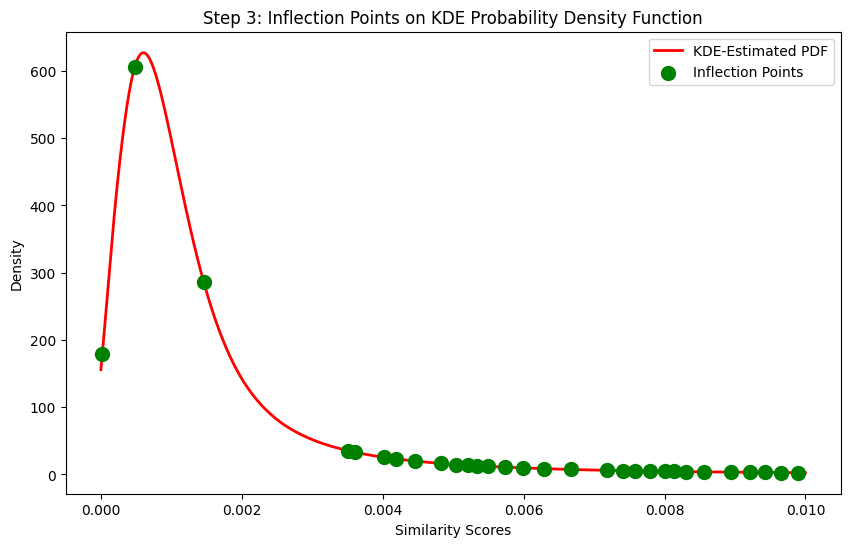

In [7]:
# Step 3: Identify inflection points
inflection_maxima = argrelextrema(kde_pdf_second_derivative, np.greater)[0]  # Local maxima
inflection_minima = argrelextrema(kde_pdf_second_derivative, np.less)[0]  # Local minima
inflection_points = x_grid[np.concatenate((inflection_maxima, inflection_minima))]

# Plot the KDE-estimated PDF with inflection points
plt.figure(figsize=(10, 6))
plt.plot(x_grid, kde_pdf, label="KDE-Estimated PDF", color="red", linewidth=2)
plt.scatter(inflection_points, kde.evaluate(inflection_points), color="green", s=100, label="Inflection Points", zorder=5)
plt.title("Step 3: Inflection Points on KDE Probability Density Function")
plt.xlabel("Similarity Scores")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
five = np.percentile(similarity_matrix, 5)
ninety_five = np.percentile(similarity_matrix, 95)

inflection_points = np.append(inflection_points, [ninety_five, five])

In [ ]:
with open('inflection_points.pkl', 'wb') as f:
    pickle.dump(inflection_points, f)